In [6]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
n_task_per_file = 50
n_files = 10
base_dir = "noise_sd=1/vary_r_nomarg_noisesd_1.0_n_200_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [8]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [9]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,full,UV(0.1)
0,0.714286,0.833333,0.833333,0.666667,0.666667,0.666667,1.000000
1,0.833333,1.000000,0.800000,0.833333,0.500000,0.333333,1.000000
2,1.000000,1.000000,0.833333,0.666667,0.666667,0.833333,0.833333
3,1.000000,1.000000,0.666667,0.571429,0.833333,0.833333,0.833333
4,0.600000,1.000000,1.000000,0.666667,0.600000,0.800000,1.000000
...,...,...,...,...,...,...,...
27,0.833333,1.000000,1.000000,0.714286,0.571429,0.571429,1.000000
28,1.000000,1.000000,0.833333,0.666667,0.666667,0.833333,1.000000
29,1.000000,1.000000,1.000000,0.600000,0.600000,1.000000,1.000000
30,0.833333,1.000000,0.714286,0.833333,0.500000,0.833333,0.833333


In [10]:
length_df

,0.1,0.2,0.3,0.4,0.5,full,UV(0.1)
0,10.615316,12.306657,13.095929,14.546049,15.384480,6.626660,21.821449
1,14.045661,14.687369,19.173653,13.039020,13.696844,7.055511,21.821449
2,12.210716,13.880192,14.072902,15.342350,14.936158,6.593371,21.821449
3,13.147903,13.376440,15.828648,13.841975,13.164183,5.503158,21.821449
4,12.429473,14.815730,14.581116,13.457383,11.839506,5.688491,21.821449
...,...,...,...,...,...,...,...
27,13.142729,13.091498,13.350771,12.377335,11.414971,6.639520,21.821449
28,16.127517,16.356749,15.960606,12.734777,13.412396,6.809263,21.821449
29,10.626575,13.368191,14.387601,14.013753,13.302618,6.507646,21.821449
30,13.236181,16.269771,13.172530,12.957264,13.018769,7.459562,21.821449


In [11]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,full,UV(0.1)
0,4.396477,4.557094,4.986945,4.839732,4.520654,4.520654,4.700505
1,4.286183,4.569490,4.457764,4.482212,4.497405,4.497405,4.445539
2,4.877949,4.483372,4.987324,4.375576,4.873755,4.873755,4.452874
3,5.284035,5.117594,5.620881,5.022657,5.383322,5.383322,5.414247
4,5.259783,5.084493,5.033499,5.071500,5.043945,5.043945,5.024003
...,...,...,...,...,...,...,...
27,5.670790,5.097034,5.113959,5.000800,4.942757,4.942757,5.259865
28,4.622658,4.586093,4.727194,4.727584,4.751823,4.751823,4.689221
29,4.551230,4.474780,4.941591,4.059981,4.956677,4.956677,3.974698
30,4.967015,4.826458,4.491072,4.360998,4.453960,4.453960,4.287272


In [12]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1        0.871218
0.2        0.930922
0.3        0.819213
0.4        0.662899
0.5        0.575316
full       0.778436
UV(0.1)    0.903014
dtype: float64
Length :
 0.1        13.160271
0.2        13.838898
0.3        14.073759
0.4        13.757745
0.5        13.284402
full        6.716063
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.746491
0.2        4.757680
0.3        4.804292
0.4        4.776674
0.5        4.750693
full       4.750693
UV(0.1)    4.815330
dtype: float64


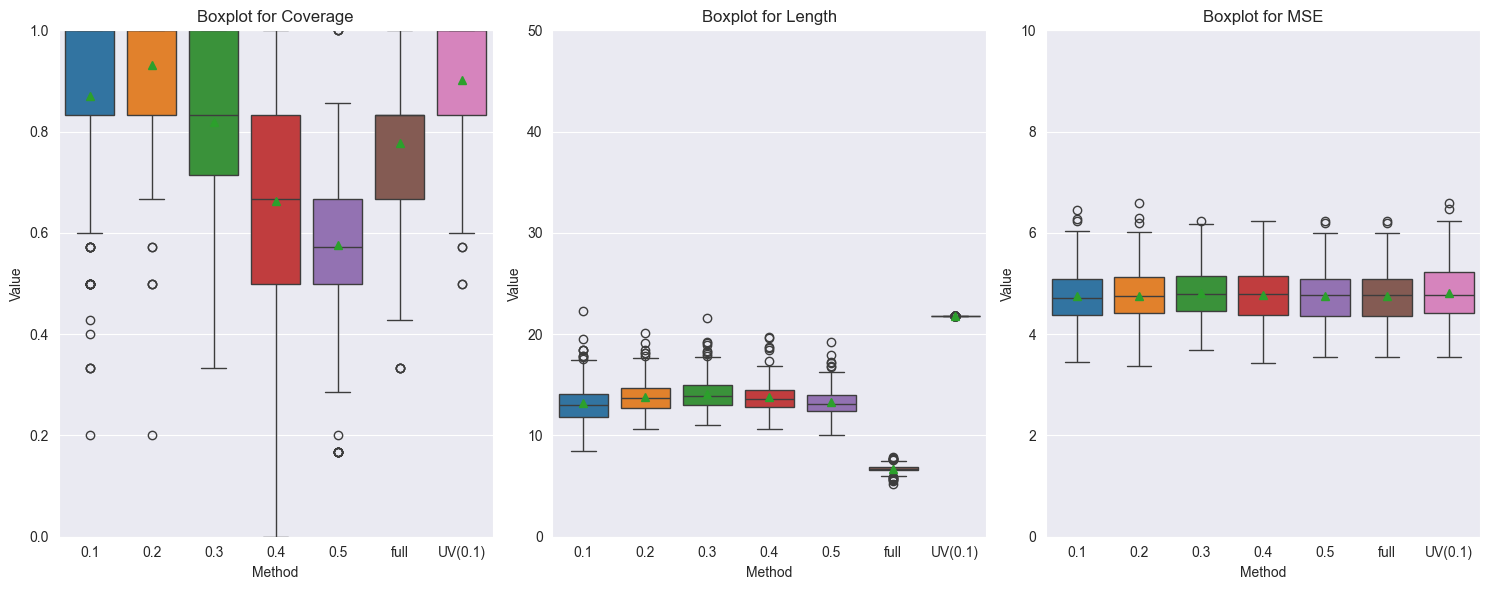

In [13]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 0.1        0.835317
0.2        0.964881
0.3        0.795635
0.4        0.666865
0.5        0.617262
full       0.765873
UV(0.1)    0.932540
dtype: float64
Length :
 0.1        12.906963
0.2        13.674200
0.3        13.932753
0.4        13.537359
0.5        13.334720
full        6.777640
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.794437
0.2        4.825551
0.3        4.924132
0.4        4.808432
0.5        4.789856
full       4.789856
UV(0.1)    4.734692
dtype: float64


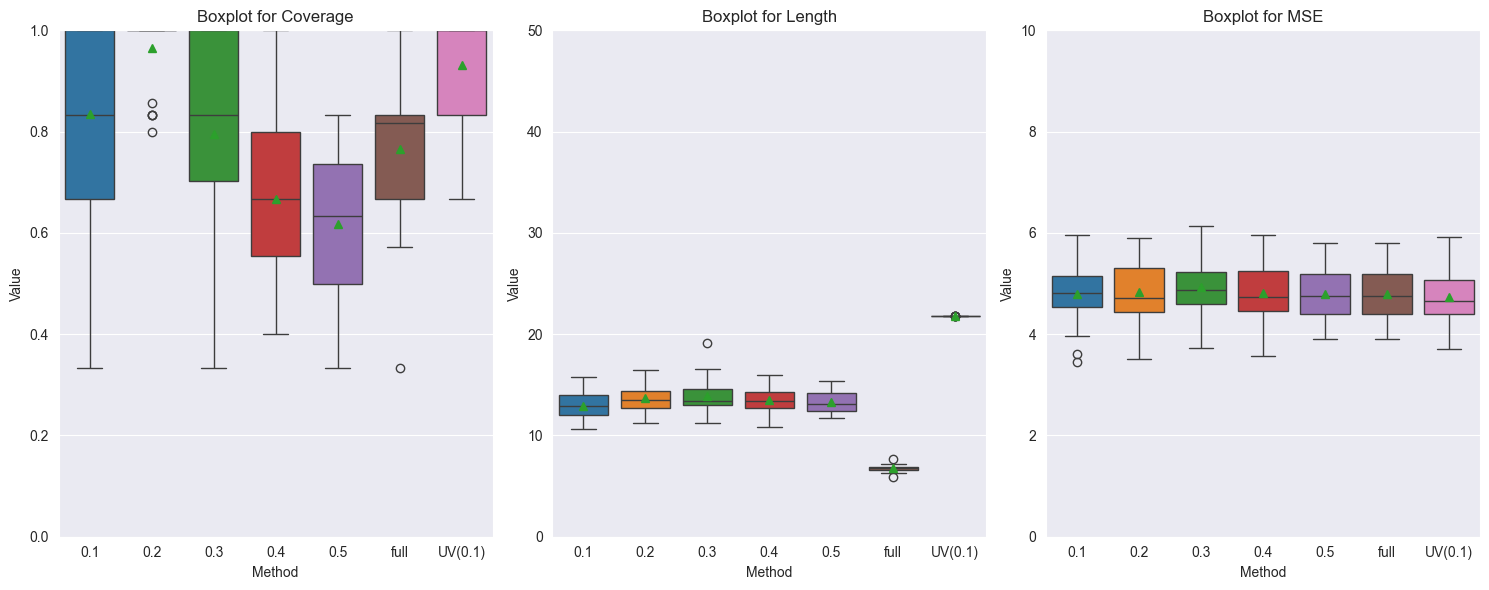

In [19]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [682]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,full,UV(0.1)
0,0.857143,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,0.666667,0.75
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.166667,1.000000,0.571429,0.857143,1.00
2,1.000000,0.666667,1.000000,0.571429,0.714286,0.833333,0.833333,0.666667,0.833333,1.00
3,1.000000,1.000000,1.000000,0.571429,1.000000,0.571429,1.000000,0.833333,0.833333,0.75
4,0.800000,1.000000,0.200000,0.600000,1.000000,0.166667,1.000000,1.000000,0.800000,1.00
...,...,...,...,...,...,...,...,...,...,...
21,1.000000,0.800000,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.50
22,1.000000,0.833333,1.000000,0.833333,1.000000,1.000000,0.666667,0.166667,0.333333,0.50
23,1.000000,0.833333,1.000000,0.833333,0.500000,1.000000,0.833333,1.000000,1.000000,0.50
24,0.666667,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [36]:
a.min(axis=1) > -1

5

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)

True